In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from skimage.external.tifffile import imread
from skimage import io
import os
from os.path import join as oj
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate, train_test_split
import torch
import torchvision
import pandas as pd
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
out_dir = '/scratch/users/vision/chandan/cnns/'
os.listdir(out_dir)
device = 'cpu'

# plot evolution of random weights

In [12]:
# initialized at epoch0
model_name = 'resnet18'
keys = ['features.module.0.weight', 'features.module.3.weight', 'features.module.6.weight', 'classifier.4.weight', 'classifier.6.weight']
keynames = ['conv1', 'conv2', 'conv3', 'fc2', 'fc3']
ws = {key: [] for key in keys}
top1 = []

# pick random idxs
np.random.seed(13)
idxs = np.random.choice(np.arange(10000), size=10, replace=False)
T = 20
for i in tqdm(range(1, T)): # there are 80 something
    checkpoint = torch.load(oj(out_dir, 'alexnet', f'checkpoint_{i}.pth.tar'), map_location=device)
    ws_dict = checkpoint['state_dict']
    top1.append(checkpoint['best_prec1']) # not actually best
    for k in keys:
        ws[k].append(ws_dict[k].cpu().numpy().flatten()[idxs])

 22%|██▏       | 17/79 [00:25<03:46,  3.65s/it]ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



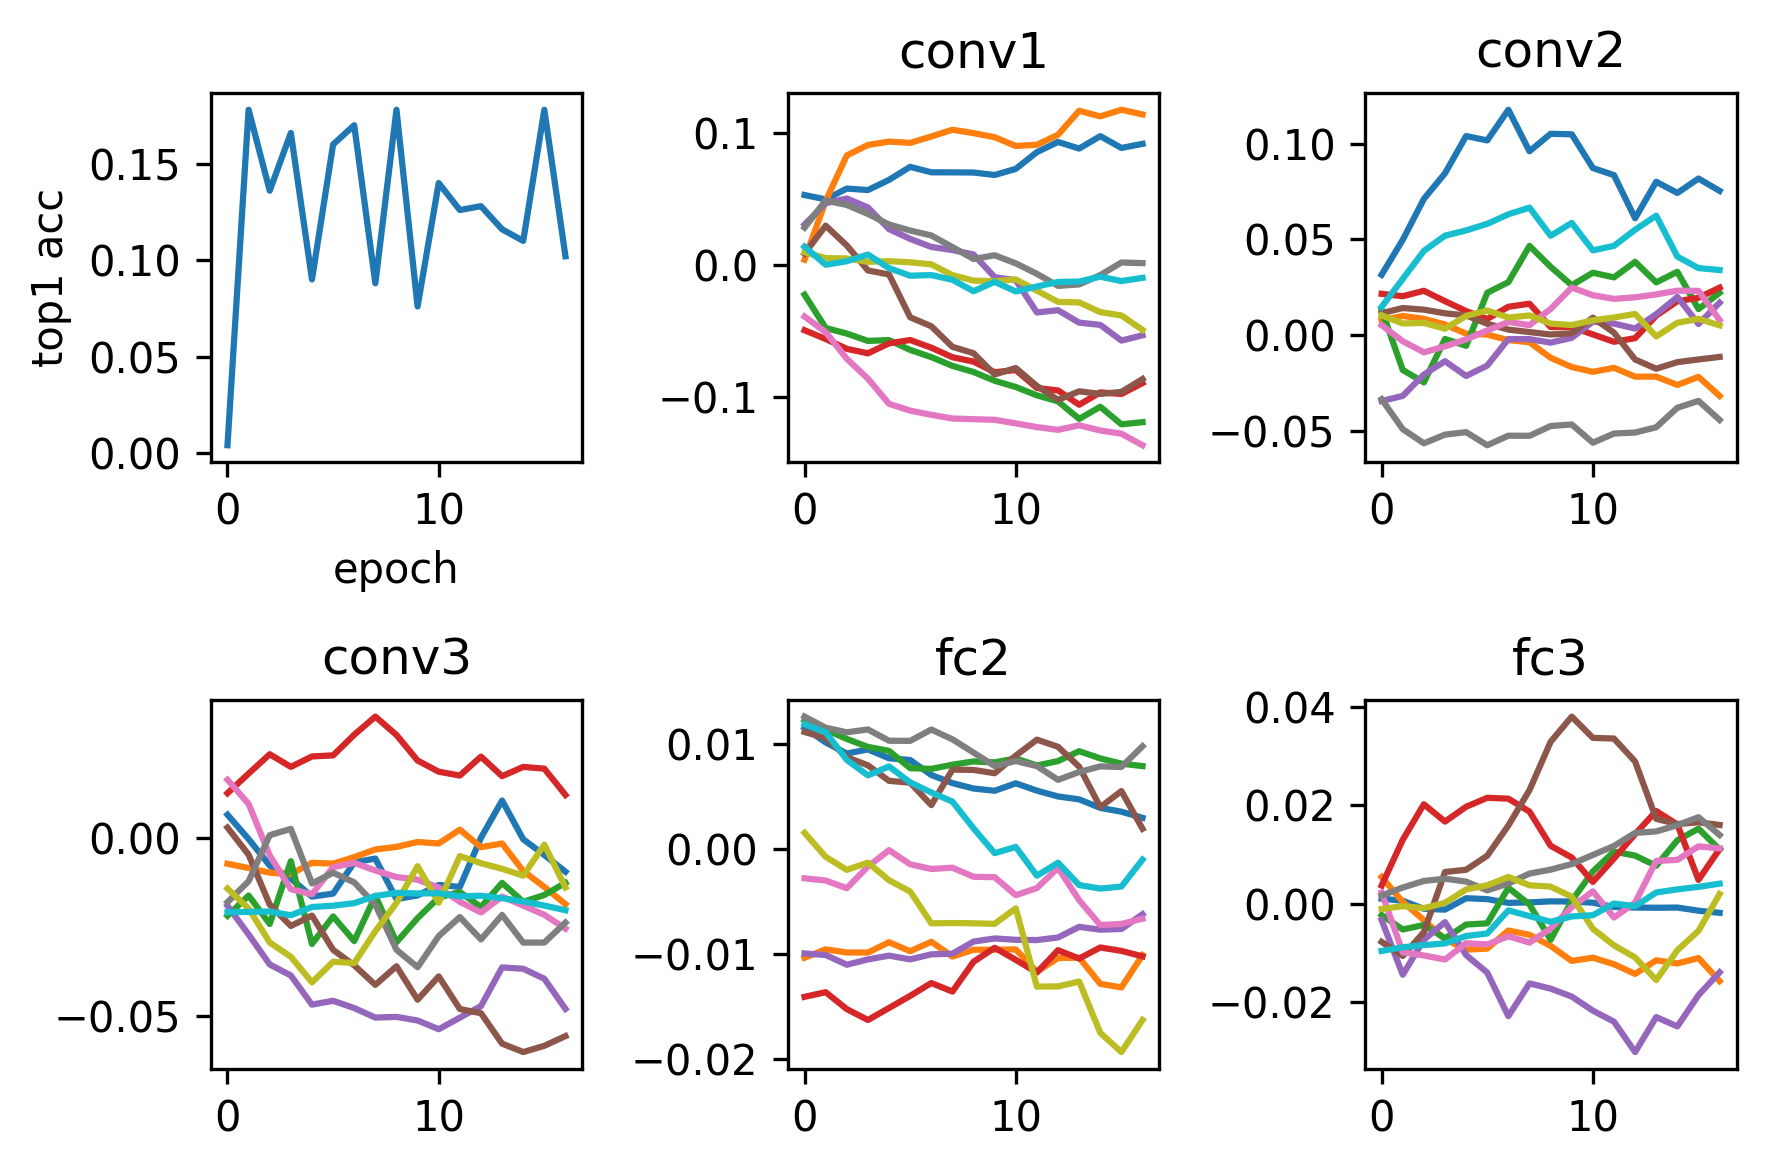

In [13]:
R, C = 2, 3
plt.figure(dpi=300)
plt.subplot(R, C, 1)
plt.plot(top1)
plt.ylabel('top1 acc')
plt.xlabel('epoch')

for i in range(len(keys)):
    plt.subplot(R, C, i + 2)
    plt.plot(ws[keys[i]])
    plt.title(keynames[i])

plt.tight_layout()
plt.savefig('evol.pdf')
plt.show()

In [88]:
stacked = np.zeros((len(keynames) * idxs.size, 79))

In [85]:
stacked.shape

(50, 80)

In [91]:
row = 0
offset = idxs.size
for k in keys:
    w = ws[k]
    stacked[row: row + offset] = np.array(w).T
    row += offset
#     print(np.array(w).shape)

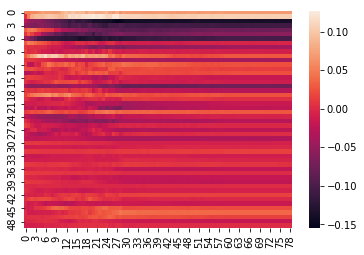

In [97]:
sns.heatmap(stacked)
plt.show()

- code: https://github.com/windows7lover/RegularizedNonlinearAcceleration
- description of path is smooth but depends on knowing how to evolve the path irrespective of the initialization
    - in the ARMA case, must depend only on first

# make more predictions

In [ ]:
alexnet = torchvision.models.alexnet(pretrained=False)